In [2]:
!pip install sklearn

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.datasets import fetch_openml

In [6]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [7]:
X.shape

(70000, 784)

In [8]:
y.shape

(70000,)

In [9]:
images = X.reshape((-1, 28, 28))

In [10]:
images.shape

(70000, 28, 28)

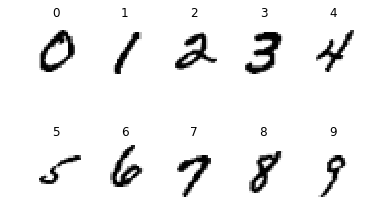

In [42]:
plt.figure()
n = 0
for i in range(10):
    while int(y[n])!=i:
        n+=1
    plt.subplot(2,5,i+1)
    plt.title(y[n])
    plt.imshow(images[n],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.axis("off")
plt.show()

    
    

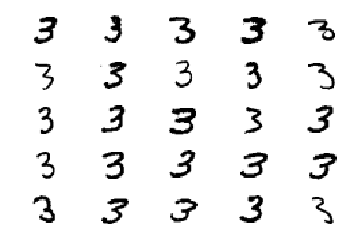

In [46]:
plt.figure()
n = 0
for i in range(25):
    while int(y[n])!=3:
        n+=1
    plt.subplot(5,5,i+1)
   # plt.title(y[n])
    plt.imshow(images[n],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.axis('off')
    n+=1
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

sample = np.random.randint(len(X), size=5000)
xsample=X[sample]
ysample=y[sample]
xtrain, xtest, ytrain, ytest = train_test_split(xsample, ysample, train_size=0.8)

In [15]:
xtrain.shape


(4000, 784)

In [16]:
xtest.shape

(1000, 784)

In [17]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [18]:
knn.score(xtest,ytest)

0.92

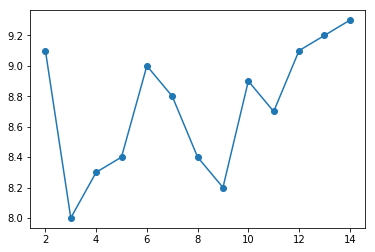

In [19]:
errors = []
for k in range(2,15):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(xtrain, ytrain).score(xtest, ytest)))
plt.plot(range(2,15), errors, 'o-')
plt.show()

In [20]:
# On récupère le classifieur le plus performant
knn = neighbors.KNeighborsClassifier(3)
knn.fit(xtrain, ytrain)

# On récupère les prédictions sur les données test
predicted = knn.predict(xtest)

Pourcentage d'erreurs:  8.0


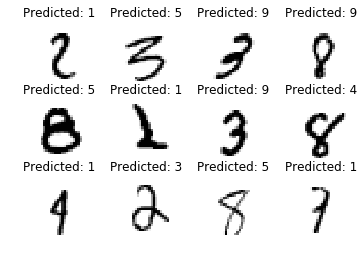

In [22]:
# on récupère les données mal prédites 

misclass = (ytest != predicted)
print("Pourcentage d'erreurs: ",100*np.sum(misclass)/len(misclass))
misclass_images = xtest.reshape((-1, 28, 28))[misclass,:,:]

misclass_predicted = predicted[misclass]


# on sélectionne un échantillon de ces images

select = np.random.randint(misclass_images.shape[0], size=12)


# on affiche les images et les prédictions (erronées) associées à ces images

for index, value in enumerate(select):

    plt.subplot(3,4,index+1)

    plt.axis('off')

    plt.imshow(misclass_images[value],cmap=plt.cm.gray_r,interpolation="nearest")

    plt.title('Predicted: {}'.format(misclass_predicted[value]))


plt.show()

In [23]:
from sklearn.model_selection import train_test_split

sample = np.random.randint(len(X), size=10000)
xsample=X[sample]
ysample=y[sample]
xtrain, xtest, ytrain, ytest = train_test_split(xsample, ysample, train_size=0.8)

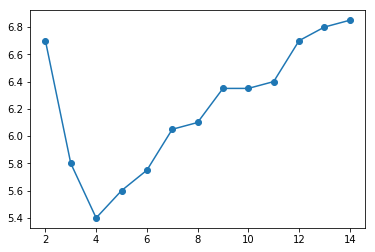

In [24]:
errors = []
for k in range(2,15):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(xtrain, ytrain).score(xtest, ytest)))
plt.plot(range(2,15), errors, 'o-')
plt.show()

In [25]:
# On récupère le classifieur le plus performant
knn = neighbors.KNeighborsClassifier(4)
knn.fit(xtrain, ytrain)

# On récupère les prédictions sur les données test
predicted = knn.predict(xtest)

Pourcentage d'erreurs:  5.4


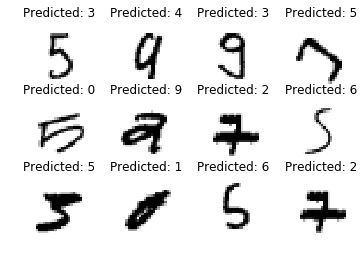

In [26]:
# on récupère les données mal prédites 

misclass = (ytest != predicted)
print("Pourcentage d'erreurs: ",100*np.sum(misclass)/len(misclass))
misclass_images = xtest.reshape((-1, 28, 28))[misclass,:,:]

misclass_predicted = predicted[misclass]


# on sélectionne un échantillon de ces images

select = np.random.randint(misclass_images.shape[0], size=12)


# on affiche les images et les prédictions (erronées) associées à ces images

for index, value in enumerate(select):

    plt.subplot(3,4,index+1)

    plt.axis('off')

    plt.imshow(misclass_images[value],cmap=plt.cm.gray_r,interpolation="nearest")

    plt.title('Predicted: {}'.format(misclass_predicted[value]))


plt.show()

In [27]:
from sklearn.model_selection import train_test_split

sample = np.random.randint(len(X), size=1000)
xsample=X[sample]
ysample=y[sample]
xtrain, xtest, ytrain, ytest = train_test_split(xsample, ysample, train_size=0.8)

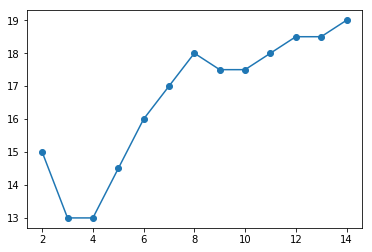

In [28]:
errors = []
for k in range(2,15):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(xtrain, ytrain).score(xtest, ytest)))
plt.plot(range(2,15), errors, 'o-')
plt.show()

In [29]:
# On récupère le classifieur le plus performant
knn = neighbors.KNeighborsClassifier(4)
knn.fit(xtrain, ytrain)

# On récupère les prédictions sur les données test
predicted = knn.predict(xtest)

Pourcentage d'erreurs:  13.0


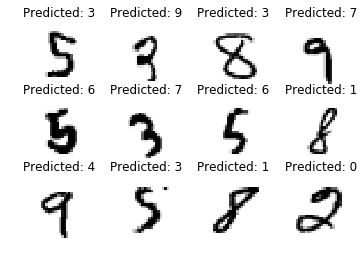

In [41]:
# on récupère les données mal prédites 

misclass = (ytest != predicted)
print("Pourcentage d'erreurs: ",100*np.sum(misclass)/len(misclass))
misclass_images = xtest.reshape((-1, 28, 28))[misclass,:,:]

misclass_predicted = predicted[misclass]


# on sélectionne un échantillon de ces images
import random
select=list(range(misclass_images.shape[0]))
random.shuffle(s)
select=select[:12]


# on affiche les images et les prédictions (erronées) associées à ces images

for index, value in enumerate(select):

    plt.subplot(3,4,index+1)

    plt.axis('off')

    plt.imshow(misclass_images[value],cmap=plt.cm.gray_r,interpolation="nearest")

    plt.title('Predicted: {}'.format(misclass_predicted[value]))


plt.show()